In [ ]:
from datasets import load_dataset
import re

In [ ]:
dataset = load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", streaming=True, split="tel_Telu")

In [ ]:
def telugu_sentence_tokenizer(text):
    return re.split(r'(?<=[।!?॥.])\s+', text)

def telugu_word_tokenizer(text):
    url = r'https?://\S+'
    email = r'\b[\w\.-]+@[\w\.-]+\.\w+\b'
    date = r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b'
    decimal = r'\b\d+\.\d+\b'
    number = r'\b\d+\b'
    telugu = r'[\u0C00-\u0C7F]+'
    english = r'[a-zA-Z]+'
    punctuation = r'[.,!?;:"(){}\[\]<>|/@#$%^&*_+=~`\'“”‘’₹…-]'
    pattern = f'{url}|{email}|{date}|{decimal}|{number}|{telugu}|{english}|{punctuation}'
    return re.findall(pattern, text)

In [ ]:
N = 2000
tokens = []

for i, example in enumerate(dataset):
    if i >= N:
        break
    text = example['text'].strip()
    sentences = telugu_sentence_tokenizer(text)
    for s in sentences:
        words = telugu_word_tokenizer(s)
        tokens.extend(words)

print("Total tokens extracted:", len(tokens))
print("Sample tokens:", tokens[:50])

Total tokens extracted: 42381
Sample tokens: ['అమెరికా', 'అధ్యక్షుడు', 'డొనాల్డ్', 'ట్రంప్', 'కు', 'రాష్ట్రపతి', 'భవన్', 'వద్ద', 'ఘనస్వాగతం', 'లభించింది', '.', 'ఆయనకు', 'రాష్ట్రపతి', 'రామ్', 'నాథ్', 'కోవింద్', 'దంపతులు', ',', 'ప్రధాని', 'మోదీ', 'సాదరంగా', 'ఆహ్వానం', 'పలకడంతో', 'పాటు', 'సైనికులు', 'గౌరవ', 'వందనాన్ని', 'అందించారు', '.', 'ఇటు', 'తెలంగాణలో', 'కరోనా', 'వైరస్', 'కారణంగా', 'అన్ని', 'దేవాలయాల్లో', 'ముందస్తు', 'చర్యలు', 'చేపట్టారు', '.', 'భద్రాద్రి', 'రాముడికి', 'కరోనా', 'ఎఫెక్ట్', 'తగిలింది', '.', 'ఏప్రిల్', 'న', 'భద్రాద్రిలో', 'జరగనున్న']


In [ ]:
# Cell 2: Frequency distribution dictionary (no predefined library)

freq_dict = {}
for word in tokens:
    word = word.lower().strip()
    if word:
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

print("Unique tokens:", len(freq_dict))
print("Sample frequencies:", list(freq_dict.items())[:20])

Unique tokens: 14568
Sample frequencies: [('అమెరికా', 13), ('అధ్యక్షుడు', 14), ('డొనాల్డ్', 1), ('ట్రంప్', 3), ('కు', 119), ('రాష్ట్రపతి', 8), ('భవన్', 5), ('వద్ద', 21), ('ఘనస్వాగతం', 1), ('లభించింది', 6), ('.', 4166), ('ఆయనకు', 2), ('రామ్', 23), ('నాథ్', 6), ('కోవింద్', 4), ('దంపతులు', 4), (',', 1266), ('ప్రధాని', 11), ('మోదీ', 5), ('సాదరంగా', 1)]


In [ ]:
sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 20 words:")
for w, c in sorted_freq[:20]:
    print(w, ":", c)

Top 20 words:
. : 4166
, : 1266
ఈ : 437
లో : 266
కూడా : 195
ఆ : 147
- : 134
) : 129
( : 126
ను : 123
నుంచి : 122
కు : 119
కి : 119
ఉంది : 116
: : 113
అని : 109
మీ : 105
నుండి : 102
ఒక : 97
తన : 97


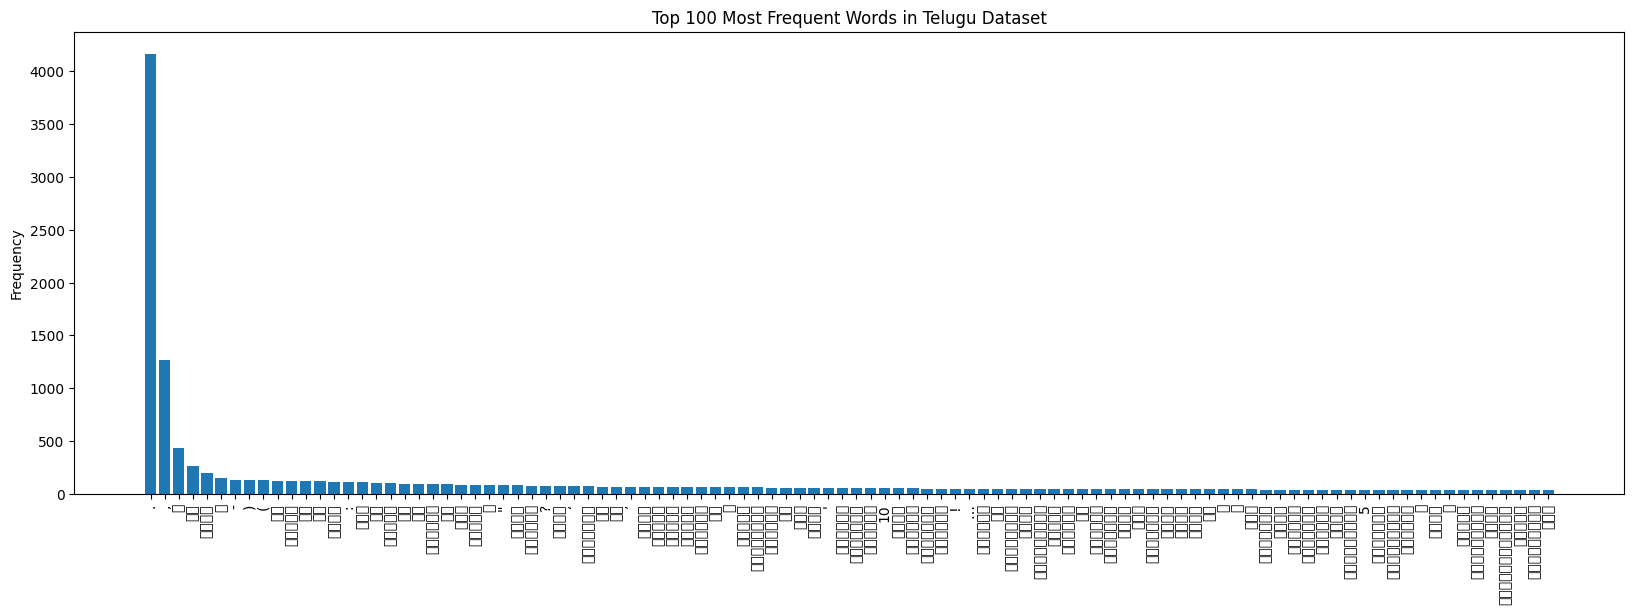

In [ ]:
import matplotlib.pyplot as plt

top100 = sorted_freq[:100]
words = [w for w, _ in top100]
counts = [c for _, c in top100]

plt.figure(figsize=(20,6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 100 Most Frequent Words in Telugu Dataset")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def get_stopwords(threshold):
    return {w for w, c in sorted_freq if c > threshold}

stopwords_500 = get_stopwords(500)
print("Stopwords (threshold=500):", list(stopwords_500)[:20])
print("Count:", len(stopwords_500))

Stopwords (threshold=500): [',', '.']
Count: 2


In [ ]:
def remove_stopwords(threshold):
    stopwords = get_stopwords(threshold)
    filtered_freq = {w: c for w, c in freq_dict.items() if w not in stopwords}
    sorted_filtered = sorted(filtered_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_filtered

filtered_500 = remove_stopwords(500)

print("Top 20 words after stopword removal (threshold=500):")
for w, c in filtered_500[:20]:
    print(w, ":", c)

Top 20 words after stopword removal (threshold=500):
ఈ : 437
లో : 266
కూడా : 195
ఆ : 147
- : 134
) : 129
( : 126
ను : 123
నుంచి : 122
కు : 119
కి : 119
ఉంది : 116
: : 113
అని : 109
మీ : 105
నుండి : 102
ఒక : 97
తన : 97
చేశారు : 94
గా : 89


/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3090 (\N{TELUGU LETTER O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3093 (\N{TELUGU LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3108 (\N{TELUGU LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3112 (\N{TELUGU LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3098 (\N{TELUGU LETTER CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: UserWarning: Glyph 3143 (\N{TELUGU VOWEL SIGN EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3994515961.py:18: 

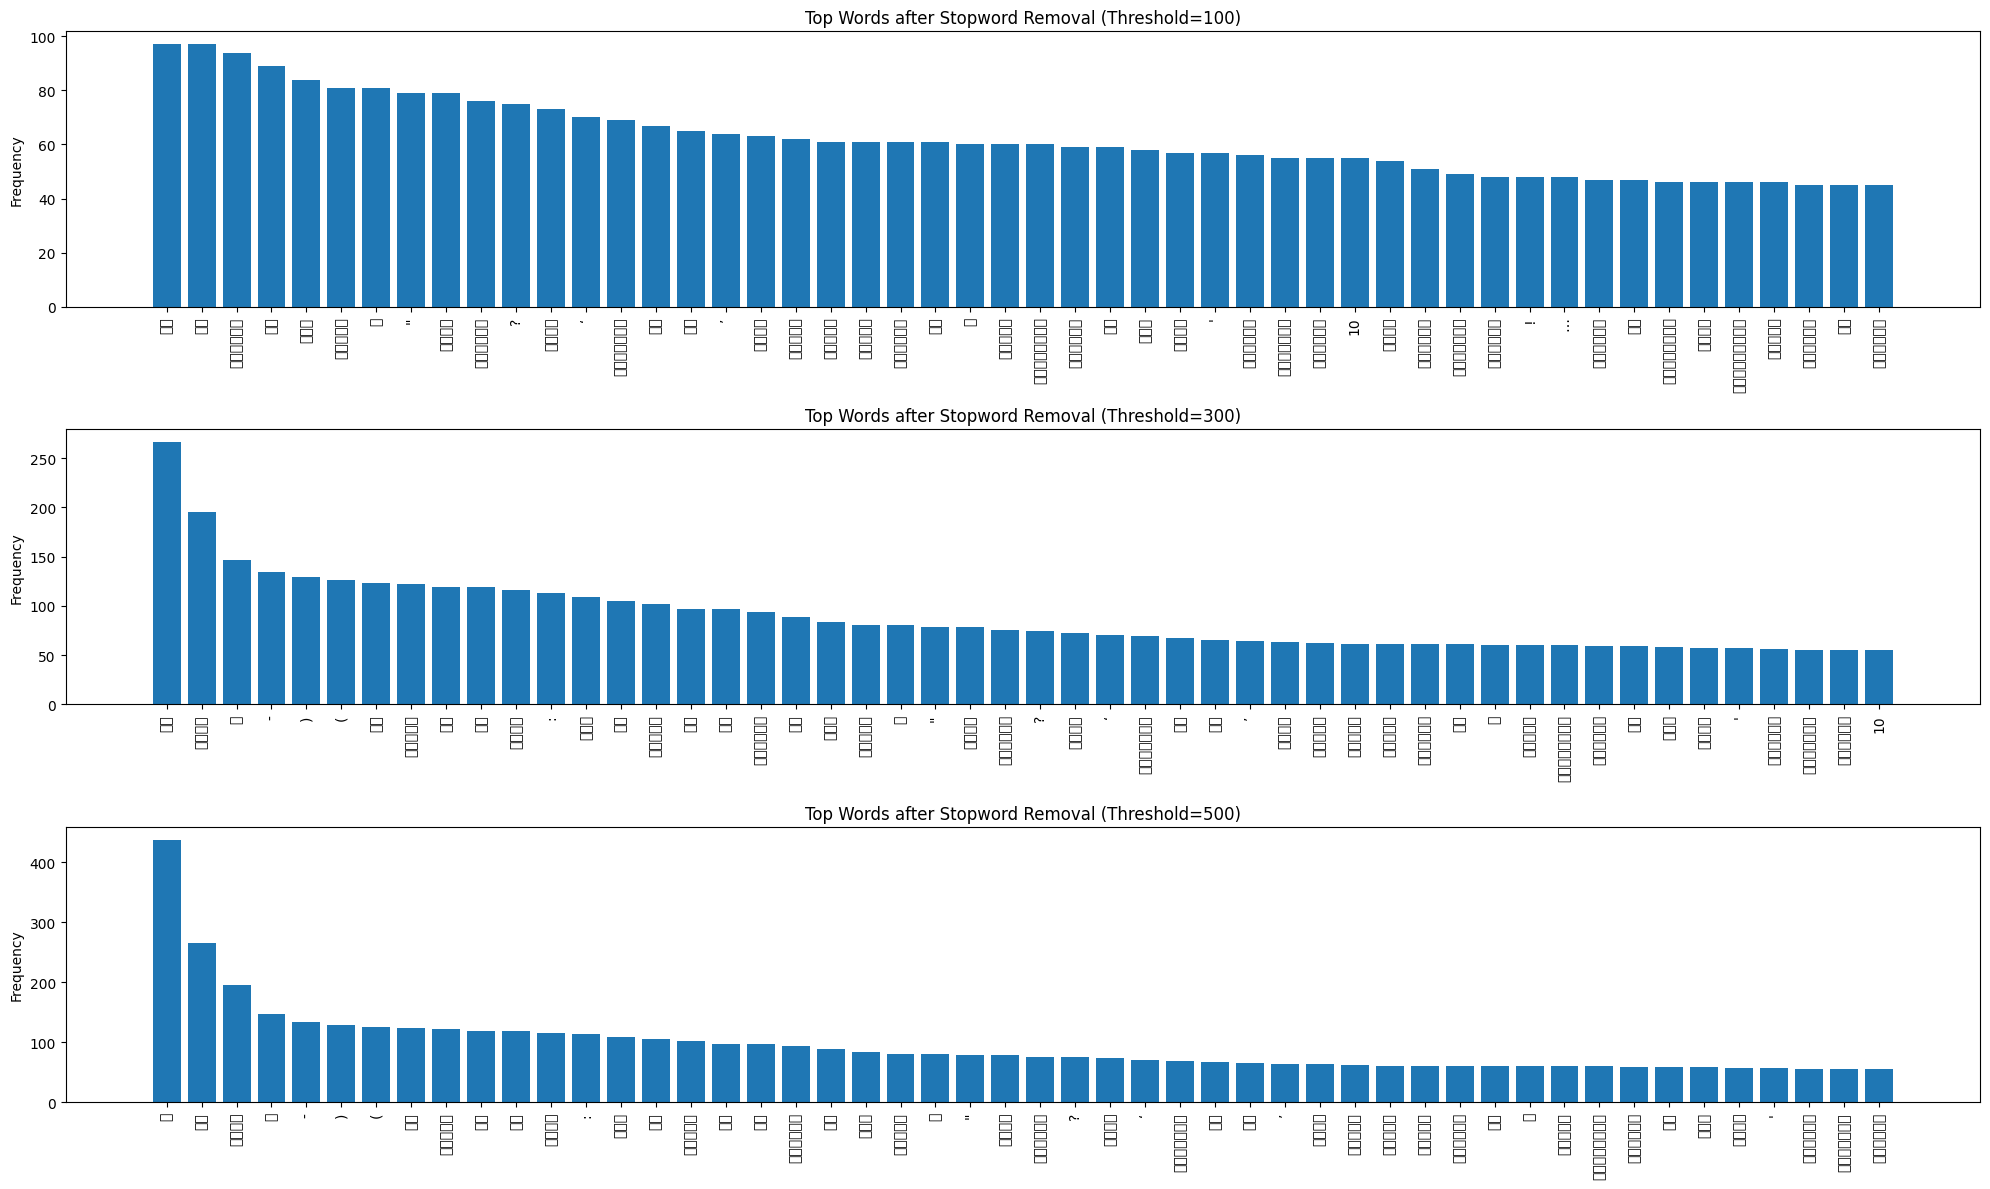

In [ ]:
thresholds = [100, 300, 500]

plt.figure(figsize=(20,12))

for i, th in enumerate(thresholds, 1):
    filtered = remove_stopwords(th)[:50]
    words = [w for w, _ in filtered]
    counts = [c for _, c in filtered]

    plt.subplot(3,1,i)
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f"Top Words after Stopword Removal (Threshold={th})")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()